# Examen Data Science & AI

| | |
| :--- | :--- |
| **Examenreeks** | Voorbeeldexamen |
| **Student:** | VUL HIER JE NAAM IN |
| **Studentennummer:** | VUL HIER JE STUDENTENNUMMER IN |
| **Datum & uur:** | EXAMENDATUM, STARTUUR |
| **Klasgroep:** | VUL HIER JE KLASGROEP IN |
| **IOEM-student:** | NEE |

Add code cells where necessary to work out the questions.  
**Please note that the contents of the code blocks are not considered as answers! Only what you write in the Markdown cells provided, counts as an answer! The contents of the code blocks only serve to substantiate your answer, so that we can see what you did to get your answer should it not match the expected outcome.

!! The exam will be in dutch for all students not enrolled in the IC !!

In [2]:
# Importeren van de nodige packages
# Vul zelf aan met extra packages als dit nodig is voor de oefeningen!
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Enkel relevant voor Google Colab:
# # Als je VS Code gebruikt, kan je deze cel verwijderen of in commentaar zetten.
# from google.colab import drive
# drive.mount('/content/gdrive')

## Question 1

Suppose we have a dataset containing log data from a web server. Each row contains information from an HTTP request sent to the server, including the following information:

1. Timestamp of the HTTP request (in Unix time, number of seconds since 1970-01-01)
2. The type of HTTP request (GET, PUT, HEAD, DELETE, ...)
3. Response time (in ms)
4. The status of the response (2xx, 4xx, 5xx, ...)

What is the measurement level of each of these variables?

nominaal <-- smaken van chips (paprika, zout, natuur, ...)

ordinaal <-- kleuterklas, lagere school, middelbaar
         <-- soldaat, sergeant, ...
         <-- beperkt aantal waarden met orderning

Ratio    <-- absoluut nulpunt, of iets is 2x zoveel als
Interval  <-- geen absoluut nulpunt, temperatuur in ° (we zeggen niet 4° is 2x zoveel als 2°)

## Answers Question 1


1.  Ratio (normaal bij tijd niet, maar hier seconden sinds dus kan wel zeggen 2x zoveel als) 
2.  nominaal
3.  Ratio
4.  nominaal (de code)

## Question 2

For a survey in a school with 100 boys and 100 girls, the following method is used to form a sample:

- All boys and girls are sorted into two rows according to their height
- A coin is tossed
    - With cross, the first boy from the boys' row is chosen
    - At coin, the first girl is chosen from the girls' row.
- This is repeated until 10 pupils are selected.

<hr/>

1. Is this a random sample? Explain.
2. What type of error is being made here?
3. Is this a good sample? Explain.

Sample moet representatief zijn voor populatie:
(iedereen moet evenveel kans hebben om gekozen te worden)

- Accidental Sampling error  \
  9 keer kop gooien en 1 keer munt

- Systemetic Sampling error = error te wijten (= error te wijten aan de manier waarop je sample hebt gekozen) \
  Enkel de 10 kleinste jongens en meisjes hebben kans om gekozen te worden, de rest niet 

- Accidental Non Sampling error \
  De jongens en meisjes hebben de vraag fout begrepen en geven een fout antwoord

- Systematic Non Sampling error \
  mensen liegen
  

## Answers Question 2

1. neen, geen random sample want niet alle jongen/meisjes hebben een kans om gekozen te worden
2. Accidental Sampling error, Accidental Non Sampling error, Systematic Sampling error
3. geen goede sample

## Question 3

In a basket are seven fruits, 4 oranges and 3 lemons. You take ...

(1) just one fruit. What is the probability that this is an orange?  
(2) one fruit and then another without putting the first one back. What is the probability that the two fruits taken are both oranges?  
(3) two fruits, one after one and without putting it back. What is the probability that the second fruit is an orange?  
(4) a first fruit, without looking! Then take another one from the basket without putting the first one back. This second fruit is an orange. Now what is the probability that the first fruit is an orange?

## Answers Question 3
opgelost doormmiddel van universum op te stellen

1. 4/7
2. 4/7 * 3/6 
3. 4/7 * 3/7 + 3/7 * 4/6 (kans or * lem + lem * or)
4. (4/7 * 3/6) / ()

## Question 4

The diameter of pistons produced in a factory are _D_ cm where _D_ ~ Nor(13.4, 0.12)

(1) The tolerance specified for the pistons is that the diameter needs to be at least 13.35 cm and not more than 13.5 cm. What proportion of the production in the factory meets these tolerance limits?  
(2) Three pistons are chosen at random. What is the probability that none of them meet the tolerance limits  
(3) A sample of 20 pistons is taken at random. The mean value for the diameter is found to be 13.43 cm. Test at the 5% significance level whether any modifications have been made to the machine producing the pistons.


In [13]:
mu = 13.45

sigma = 0.12

# kans dat het kleiner is dan 13.3 (opp linkerkant)
stats.norm.cdf(13.3, loc = mu, scale = sigma)

# kans dat het groter is dan 13.3 (opp rachterkant)
stats.norm.sf(13.3, loc = mu, scale = sigma)

# welke diameter okmt overeen met 80%
stats.norm.isf(0.2, loc = mu, scale = sigma)


np.float64(13.550994548028749)

In [12]:
kans_ertussen = stats.norm.cdf(13.5) - stats.norm.cdf(13.35)
kans_niet_tussen= 1 - kans_ertussen # complement rule
print(kans_niet_tussen **3) # kans dat 1ste niet tussenligt * kans dat 2de niet tussenligt * kans dat 3de niet tussenligt

1.0


In [11]:
# Z - test of t - test
# left tailed/ right tailed/two tailed

# sample is maar 20 MAAR de onderliggende verdeling is normaalverdeling
# + standaardafwijking is gekend

mu = 13.4
sigma = 0.12
m_sample = 13.43
n=20

alpha = 0.05 # Significance level chosen by the researcher
p = stats.norm.sf(m_sample, loc=mu, scale=sigma/np.sqrt(n))

print("p-value: %.5f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")

p-value: 0.13178
p > alpha: do not reject H0


## Answers Question 4
1. 13.550994548028749
2. 1.0
3. p_value: 0.13178, er is niet voldoende reden om de H0 te verwerpen
   - er is niet voldoende reden om aan te nemen dat de machine incorrect is afgesteld  


## Question 5

The number of employees on the payroll at a food processing company is recorded at the beginning of each month.
These data are given below.

1. Give the data types of both columns
2. Convert the 'date' column to datetime type. Even if this fails you can continue working.
3. Create the following plot.

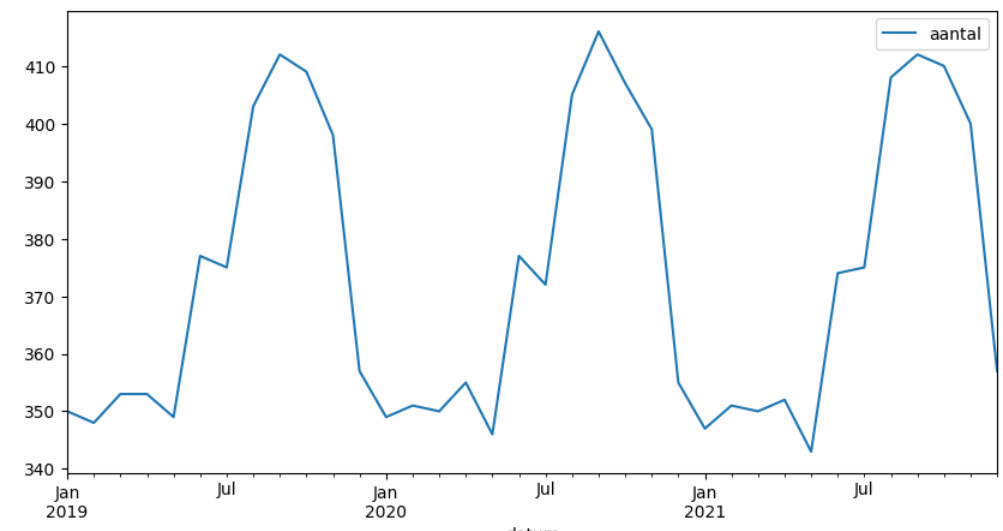

4. Make a forecast for the first four months of the next year using the most appropriate method. Explain why you chose this method.
5. Make a plot including the forecast.
6. Make the following calculations
- 6.1 Calculate the average number of employees in 2020
- 6.2 How many months did the company have more than 400 employees?




In [8]:
dfemployees = pd.DataFrame(data={
    'recording_date': ['2019/01/01', '2019/02/01', '2019/03/01', '2019/04/01', '2019/05/01', '2019/06/01', '2019/07/01', '2019/08/01', '2019/09/01', '2019/10/01', '2019/11/01', '2019/12/01', '2020/01/01', '2020/02/01', '2020/03/01', '2020/04/01', '2020/05/01', '2020/06/01', '2020/07/01', '2020/08/01', '2020/09/01', '2020/10/01', '2020/11/01', '2020/12/01', '2021/01/01', '2021/02/01', '2021/03/01', '2021/04/01', '2021/05/01', '2021/06/01', '2021/07/01', '2021/08/01', '2021/09/01', '2021/10/01', '2021/11/01', '2021/12/01'],
    'number': [350,348,353,353,349,377,375,403,412,409,398,357,349,351,350,355,346,377,372,405,416,407,399,355,347,351,350,352,343,374,375,408,412,410,400,357]
})

In [9]:
# 1
dfemployees.dtypes
#2 
dfemployees["recording_date"] = pd.to_datetime(dfemployees["recording_date"])
dfemployees = dfemployees.set_index("recording_date")

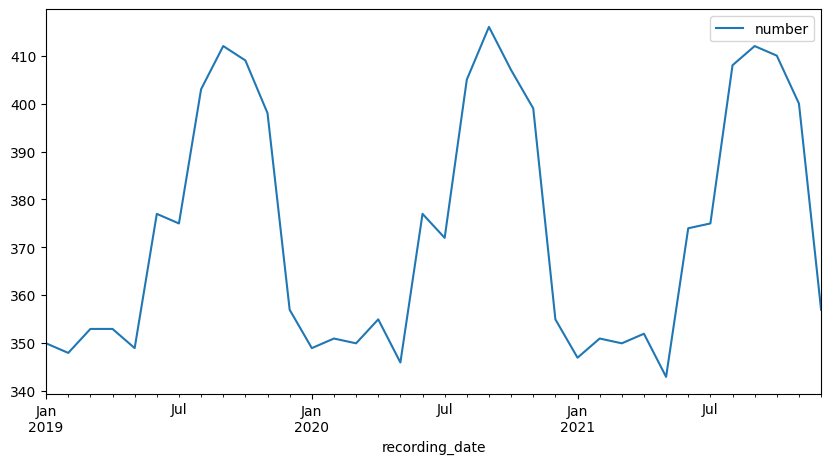

In [10]:
# 3
dfemployees.plot( y='number', figsize=[10,5]);
# gaan thriple gebruiken want er is een trend en seasonal component

In [16]:
# 4
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = dfemployees

employees_hw = ExponentialSmoothing(train, trend='add', seasonal='add', # veranderen met exponentiele trends
                                     seasonal_periods=12, freq='MS').fit()
employees_predicted = employees_hw.forecast(12)


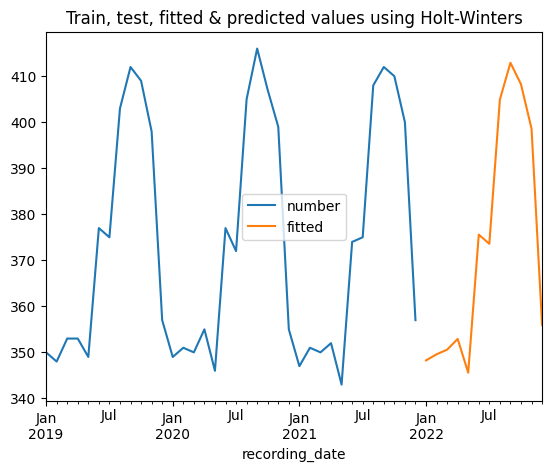

In [17]:

train.plot(legend=True, label='train')
employees_predicted.plot(legend=True, label='fitted')


plt.title('Train, test, fitted & predicted values using Holt-Winters');


In [13]:
#6 
# 6.1
print(dfemployees["2020-01-01" : "2020-12-31"]["number"].mean())

# 6.2
print(dfemployees[dfemployees.number >400]["number"].count())
# 9 months

373.5
9


## Question 6

The sample given below contains measurement results of a variable Temperature at two time points (`time1` and `time2`). We want to know whether the measurements at the second time point are significantly different from those at the first time point.

Use an appropriate statistical test (with significance level 5%) to verify this statement.

1. Visualise the data with an appropriate plot. What can you infer about the research question? Explain.
2. What statistical test should you use to answer this research question? Be as specific as possible!
3. Formulate the null hypothesis and the alternative hypothesis.
4. Calculate the p-value.
5. Draw a conclusion based on the previous step and formulate an answer to the research question.
6. Give for the observations at time `time1`:
    1. The interquartile range
    2. The kurtosis
    3. The range
    4. The standard deviation

In [7]:
temperatures = pd.DataFrame(data={
  'time1': [65, 87, 59, 71, 58, 74, 55, 98, 62, 53, 84, 63, 78, 62, 60],
  'time2': [82, 91, 86, 83, 85, 51, 65, 61, 76, 65, 53, 70, 51, 55, 68]
})

<Axes: >

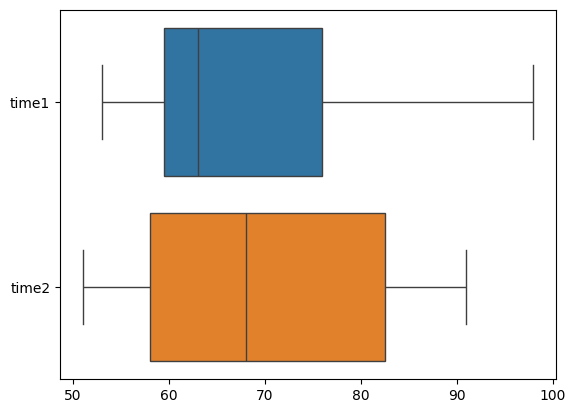

In [31]:
# is het gemiddelde van de ene rij significant verschillend van het gemiddelde van de andere rij?
sns.boxplot(
  data=temperatures, 
  orient='h'
  )

In [34]:
# meten 2 tijdstippen op zelfde plaatsen

# H0 = geen significant verschile tussen de temperaturen op time 1en time 2
# H1 = is temperatuur op time2 significant hoger? (mediaan op plot meer naar rechts!) 

In [36]:
# alternative = less (mediaan is kleiner op time1)
# alternative = greater (mediaan is groter op time1)
# alternatice = two-sided (is er een significant verschil)

s, p_value = stats.ttest_rel(temperatures["time1"],temperatures["time2"], alternative='less') 

print(p_value)

0.43719974299972214


In [37]:
# conclusie 
# p_value = 0.43 = 43% >> 5% => niet voldoende reden om H0 te verwerpen
# Er is onvoldoende aanleiding om te zeggen dat de temperatuur op time1 kleinder is dan time2

In [38]:
print(f"Range :    {temperatures['time1'].max() - temperatures['time1'].min()}")
print(f"Standard deviation:  {temperatures['time1'].std()}") # Pay attention: n-1 in the denominator
print("Inter Quartile Range:", temperatures['time1'].quantile(.75) - temperatures['time1'].quantile(.25))
print(f"Skewness:            {temperatures['time1'].skew()}")
print(f"Kurtosis:            {temperatures['time1'].kurtosis()}") # hoe afgeplat of puntig is de verdeling

Range :    45
Standard deviation:  13.09743704481366
Inter Quartile Range: 16.5
Skewness:            0.9711692267411806
Kurtosis:            0.15796776764037945


## Answers Question 6


1.
2.
3.
4.
5.
6.
   1.
   2.
   3.
   4.

## Question 7

The figure below shows a graph of a time series.  The observations are plotted in black with a solid line. In addition, three forms of moving average are plotted.

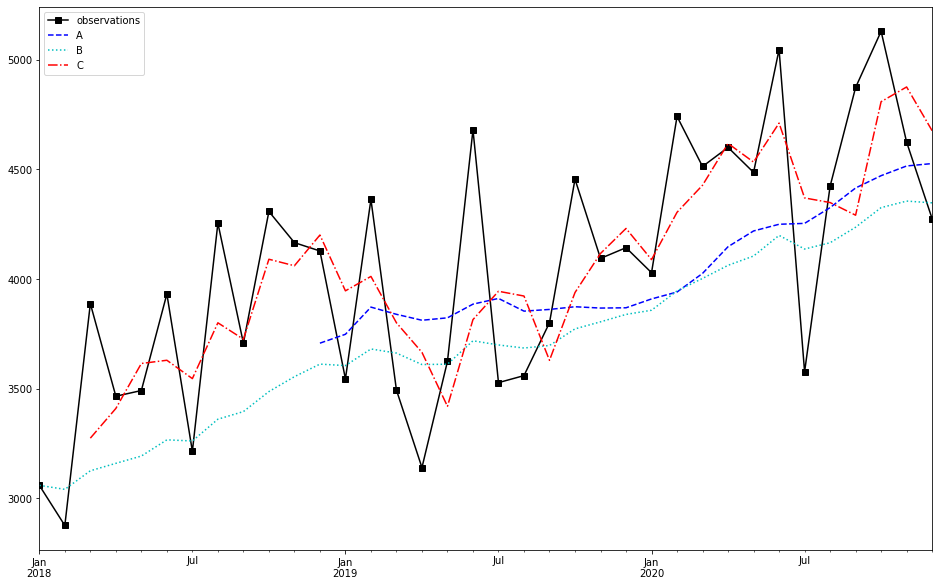

For each (A, B, C), indicate exactly what form of moving average is involved. Choose from the options given below:

- Simple moving average with period 3
- Simple moving average with period 12
- Simple exponential smoothing with $alpha = 0.1$ 
- Simple exponential smoothing with $alpha = 0.9$ (staat er niet bij hier)

If you had to set up a model for this time series based on exponential smoothing, which one would you use? Explain shortly your answer.

## Answers question 7

1. A (purple, - - - -): SMA12
2. B (cyan, ....): SES with alpha 0.1 (bij 0.9 zou meer de originele curve volgen)
3. C (red, - . - .): SMA3
4. The most appropriate form of exponential smoothing is ... because ...


## Question 8

Given last year's mileage and maintenance costs of 23 trucks.

(1) Make the plot below (In the Answers, give the command for this plot)

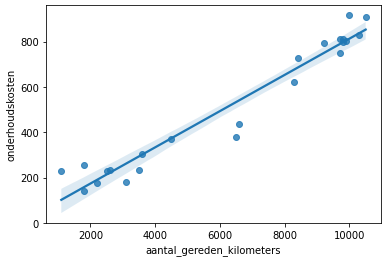

(2) Give the equation of the line   
(3) Calculate the correlation coefficient (symbol + value)  
(4) Formulate an interpretation for the value of the correlation coefficient  
(5) Approximately how much will be the maintenance cost of a truck driving 5000 kilometres.  
(6) What will be the approximate fixed cost of a truck even if it has not driven a single kilometre?  



In [8]:
sample_data = pd.DataFrame(data = {
    'mileage': [10500, 9700, 9200, 8300, 6500, 4500, 3500, 2200, 1800, 9800, 6600, 3600, 2500, 3100, 8400, 9700, 1800, 10000, 9800, 9900, 1100, 2600, 10300],
    'maintenance costs': [908.56, 751.12, 793.55, 619.61, 380.11, 368.72, 235.32, 174.93, 256.30, 799.58, 436.04, 304.25, 226.81, 179.68, 726.65, 810.53, 142.53, 915.53, 812.45, 803.78, 227.32, 231.46, 829.21]})

<Axes: xlabel='mileage', ylabel='maintenance costs'>

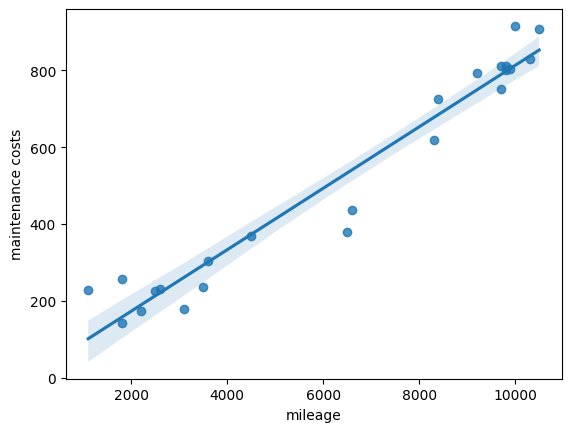

In [ ]:
# getallen op de x en y as => lin regressie
# lin reg ook voor tijdreeksen

sns.regplot(data= sample_data, x="mileage", y = "maintenance costs")

In [43]:
a, b = np.polyfit(sample_data["mileage"], sample_data["maintenance costs"], 1) # 1 = voor welke graad

print(f'de vergelijking van de rechte y = {a} * x + {b}')


de vergelijking van de rechte y = 0.07989843131805248 * x + 13.774264624137674


In [ ]:
cor = np.corrcoef(
    sample_data["mileage"],
    sample_data["maintenance costs"])[0][1]
print(f"R ≈ {cor:.4f}") 

# covariantie > 0 => stijgend verband + covariantie < 0 => dalend verband
# grootte covariantie afhankelijk ven gebruikte eenheid

# correlatie
# correlatie > 0 => stijgend verband + correlatie < 0 => dalend verband

# 0.9735 => zeet sterk verband (zeer dicht bij de rechte)

# R^2
# ...% van de variantie op y-as wordt verklaard door de variantie op de X-as 

R ≈ 0.9735


In [49]:
cost = a * 5000 + b
cost_0 = a*0+b
print(f'cost: {cost}, cost_0: {cost_0}')

cost: 413.26642121440005, cost_0: 13.774264624137674


## Answers Question 8


1.
2.
3.
4.
5.


## Question 9

You recently offered samples of three products to every customer who entered your business. You then asked which product customers liked best. You recorded these preferences for Product A, Product B and Product C in the dataset given below.

Do customers have a distinct preference for any of these products? Use an appropriate statistical test (with significance level 5%) to verify this statement.

1. Visualise the data with an appropriate plot. What can you infer about the research question? Explain.
2. What hypothesis test will you apply to answer this research question? Be as specific as possible!
3. Formulate the null hypothesis and the alternative hypothesis
4. Calculate the appropriate test statistic (test statistic) for this test. Give the symbol and value
5. Calculate the p-value
6. Draw a conclusion based on the previous step and formulate an answer to the research question.

In [9]:
products = pd.DataFrame(data={'Choice': [
  "Product A","Product A","Product B","Product B","Product C",
  "Product B","Product B","Product B","Product C","Product B",
  "Product C","Product A","Product C","Product B","Product C",
  "Product B","Product C","Product C","Product C","Product B",
  "Product C","Product C","Product B","Product C","Product B",
  "Product B","Product B","Product B","Product A","Product B",
  "Product B","Product B","Product B","Product B","Product C",
  "Product C","Product B","Product C","Product C","Product A",
  "Product C","Product C","Product B","Product B","Product B",
  "Product B","Product C","Product C","Product C","Product C",
  "Product C","Product B","Product A","Product C","Product C",
  "Product B","Product B","Product C","Product C","Product C",
  "Product B","Product C","Product B","Product B","Product C",
  "Product B","Product B","Product C","Product C","Product B",
  "Product C","Product C","Product C","Product B","Product B",
  "Product C","Product C","Product C","Product C","Product C",
  "Product C","Product C","Product C","Product C","Product C",
  "Product C","Product C","Product C","Product C","Product B"
]})

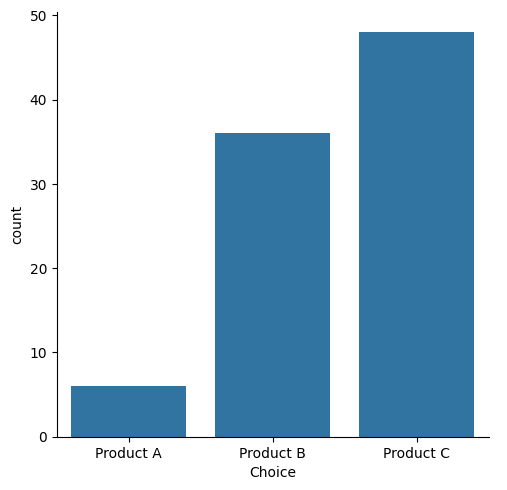

In [55]:
sns.catplot(data=products, x='Choice', kind='count');

In [56]:
# HD 4 --> op de X-as en op de y-as categorische variabelen
# chi kwadraat test
# goodness of fit test

# goodness of fit test
# H0: product A, B of C zijn even populair
# H1: product A, B od C zijn niet even populair

In [58]:
types =               ['Product A', 'Product B', 'Product C']
observed =   np.array(products['Choice'].value_counts())
expected_p = np.array([  1/3,     1/3,     1/3, ])


alpha = 0.05               # Significance level
n = sum(observed)          # Sample size
k = len(observed)          # Number of categories
dof = k - 1                # Degrees of freedom
expected = expected_p * n  # Expected absolute frequencies in the sample
g = stats.chi2.isf(alpha, df=dof)  # Critical value

# Goodness-of-fit-test in Python:
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("Significance level  ⍺ = %.2f" % alpha)
print("Sample size         n = %d" % n)
print("k = %d; df = %d" % (k, dof))
print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.4f" % p)

Significance level  ⍺ = 0.05
Sample size         n = 90
k = 3; df = 2
Chi-squared        χ² = 31.2000
Critical value      g = 5.9915
p-value             p = 0.0000


In [60]:

# Conclusie:
# chi2 = 31.2000 > g-value = 5.9915 => er is voldoende aanleiding om H0 te werwerpen
# p-value = 000% << 5%(alpha) => er is voldoende aanleiding om H0 te werwerpen
# er is voldoende aanwijzing om te zeggen dat alle producten niet even populair zijn

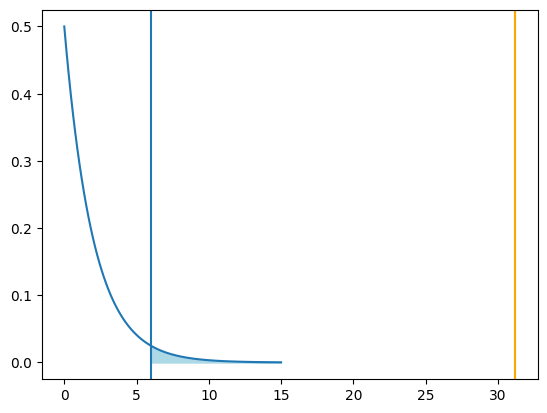

In [61]:
# Plot of the case:
# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=dof)

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange'); # chi-squared

## Answers Question 9


1.
2.
3.
4.
5.
6.